## Extract "Most replayed" metadata

In [4]:
import warnings
warnings.filterwarnings('ignore')
from selenium import webdriver
from bs4 import BeautifulSoup

In [ ]:
youtube_id = "js1CtxSY38I"

In [5]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') # 웹 브라우저를 띄우지 않는 headless 
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
chromeDriver = webdriver.Chrome('/home/nas3/user/won3/utils_won/chromedriver',chrome_options=chrome_options)
chromeDriver.get(f"https://yt.lemnoslife.com/videos?part=mostReplayed&id={youtube_id}")
#URL 주소

html = chromeDriver.page_source
html_page = BeautifulSoup(html, 'html.parser')
body = html_page.select_one('body')

from ast import literal_eval

bodydict = literal_eval(body.get_text())
mostReplayed_list = bodydict['items'][0]["mostReplayed"]['heatMarkers']

In [11]:
score_list = []
for idx, data in enumerate(mostReplayed_list):
    data_real = data['heatMarkerRenderer']
    if data_real['timeRangeStartMillis'] == 0:
        # ignore the start poinit
        continue
    heat_score = data_real['heatMarkerIntensityScoreNormalized']
    score_list.append(heat_score)
tmp = max(score_list)
max_index = score_list.index(tmp)
target_data = mostReplayed_list[max_index+1]['heatMarkerRenderer']

start_time = target_data['timeRangeStartMillis']
start_time_sec = start_time / 1000
duration = target_data['markerDurationMillis']
duration_sec = duration / 1000

In [12]:
start_time_sec, duration_sec

(128.87, 2.63)

#### 2분 8초(128초)에서 가장 많이 다시 본 장면 (https://yt.lemnoslife.com/videos?part=mostReplayed&id=js1CtxSY38I

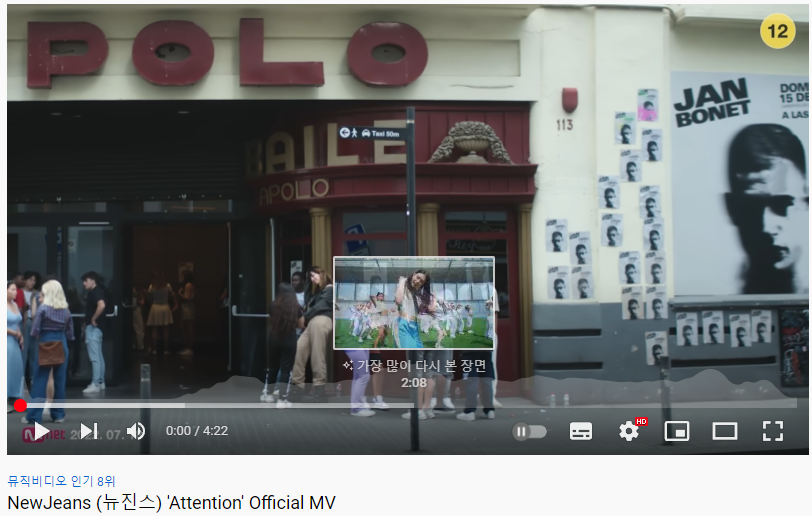

## Download Audio file

In [32]:
import subprocess
from pathlib import Path
import os

In [43]:
youtube_address = "https://youtu.be/" + youtube_id
audio_format = "wav"
raw_save_dir = "./audio_data"
Path(raw_save_dir).mkdir(exist_ok=True, parents=True)

# save filename as youtube_id
file_name = youtube_id + "." + audio_format
save_dir = os.path.join(raw_save_dir, file_name)


command = f"youtube-dl -x --audio-format {audio_format} -o {save_dir} {youtube_address}" 
#command2 = "youtube-dl " + "-x " + "--audio-format " + audio_format + " -o " + save_dir + " " + youtube_address
subprocess.call(command, shell=True)

[youtube] js1CtxSY38I: Downloading webpage
[download] ./audio_data/js1CtxSY38I.wav has already been downloaded
[download] 100% of 4.04MiB
[ffmpeg] Correcting container in "./audio_data/js1CtxSY38I.wav"
[ffmpeg] Post-process file ./audio_data/js1CtxSY38I.wav exists, skipping


0